In [24]:
# _*_ coding:utf-8 _*_
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_moons
from sklearn import linear_model
%matplotlib inline

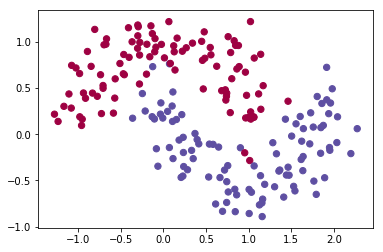

In [25]:
np.random.seed(3)
X, y = make_moons(200, noise=0.2)
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

In [26]:
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [45]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
    #plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.scatter(X[:,0], X[:, 1], c=y)
    plt.show()

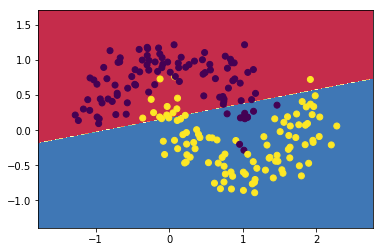

In [46]:
plot_decision_boundary(lambda x:clf.predict(x))
#plt.title("Logistic Regression")

In [47]:
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2
epsilon = 0.01
reg_lambda = 0.01

In [55]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1.0/num_examples*data_loss

In [61]:
def predict(model,x):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
    return np.argmax(probs, axis=1)

In [62]:
def build_model(nn_hdim, num_passes=20000,print_loss=False):
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    for i in range(0, num_passes):
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
        
        delta3 = probs
        delta3[range(num_examples),y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T)*(1-np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i:%f" %(i, calculate_loss(model)))
    return model

Loss after iteration 0:0.418627
Loss after iteration 1000:0.046520
Loss after iteration 2000:0.043340
Loss after iteration 3000:0.041303
Loss after iteration 4000:0.039900
Loss after iteration 5000:0.038971
Loss after iteration 6000:0.038373
Loss after iteration 7000:0.037989
Loss after iteration 8000:0.037739
Loss after iteration 9000:0.037574
Loss after iteration 10000:0.037463
Loss after iteration 11000:0.037387
Loss after iteration 12000:0.037334
Loss after iteration 13000:0.037296
Loss after iteration 14000:0.037269
Loss after iteration 15000:0.037250
Loss after iteration 16000:0.037236
Loss after iteration 17000:0.037225
Loss after iteration 18000:0.037218
Loss after iteration 19000:0.037212


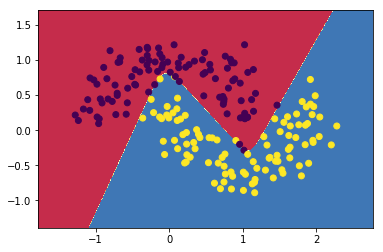

In [64]:
model = build_model(3, print_loss=True)
plot_decision_boundary(lambda x:predict(model,x))
#plt.title("Decision Boundary for hidden layer size 3")

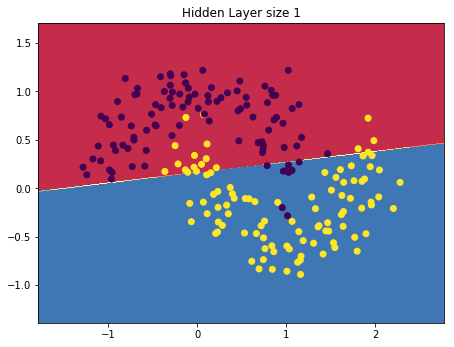

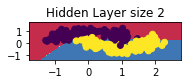

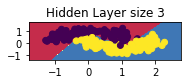

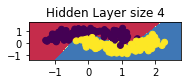

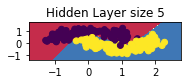

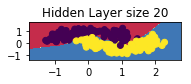

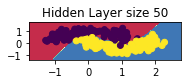

In [66]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %s'%nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x:predict(model,x))
plt.show() 